In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 1.   Importando dataset

---



In [23]:
df = pd.read_csv("CO2 Emissions_Canada.csv")

# 2.   Conhecendo e tratando dados

---





In [24]:
df.dtypes

,0
Make,object
Model,object
Vehicle Class,object
Engine Size(L),float64
Cylinders,int64
Transmission,object
Fuel Type,object
Fuel Consumption City (L/100 km),float64
Fuel Consumption Hwy (L/100 km),float64
Fuel Consumption Comb (L/100 km),float64


In [25]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [26]:
print(f"Duplicatas: {df.duplicated().sum()}")

df = df.drop_duplicates()

Duplicatas: 1103


In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
df.count()

,0
Engine Size(L),6282
Cylinders,6282
Fuel Consumption City (L/100 km),6282
Fuel Consumption Hwy (L/100 km),6282
Fuel Consumption Comb (L/100 km),6282
...,...
Transmission_M7,6282
Fuel Type_E,6282
Fuel Type_N,6282
Fuel Type_X,6282




# 3.   Visualizando uma das features

---





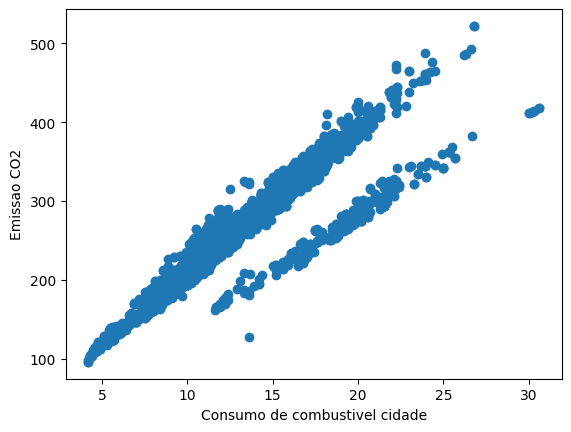

In [29]:
plt.scatter(df['Fuel Consumption City (L/100 km)'], df['CO2 Emissions(g/km)'])
plt.xlabel("Consumo de combustivel cidade")
plt.ylabel("Emissao CO2")
plt.show()



# 4.  Criando funções

---





In [30]:
model = linear_model.LinearRegression()

In [31]:
def run(X, y, test_split: float, crossValidation: bool):
  if(crossValidation):
    y_pred = cross_val_predict(model, X, y, cv = 5)
    y_true = y
  else:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_true = y_test

  return { 'pred': y_pred, 'true':y_true}

In [32]:
def calc_metricas(results: dict):
  mae = mean_absolute_error(results['true'], results['pred'])
  mse = mean_squared_error(results['true'], results['pred'])
  rmse = np.sqrt(mse)
  r2 = r2_score(results['true'], results['pred'])
  metricas = {
      'MAE': mae,
      'MSE': mse,
      'RMSE': rmse,
      'R²': r2
  }
  print(metricas)

In [33]:
def plot_acc(y_test, y_pred, barWidth: float):
  n = len(y_test)
  indices = np.arange(n)

  plt.figure(figsize=(12,6))
  plt.plot(indices, y_test, label='Valor Real', color='navy', linewidth=2)

# Plot valores previstos - área preenchida com transparência
  plt.plot(indices, y_pred, label='Valor Previsto', color='lightgreen', linewidth=2)

  plt.xlabel('Amostras')
  plt.ylabel('Valores')
  plt.legend()
  plt.show()

In [34]:
from sklearn.metrics import accuracy_score
rfr = RandomForestRegressor(random_state=42)

In [35]:
#Performa um pouco melhor sem a validação cruzada...

def rfr_run(X,y, test_split: float, crossValidation: bool):
    if(crossValidation):
      y_pred = cross_val_predict(rfr, X, y, cv = 5)
      y_true = y

    else:
      X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_split,random_state=42)
      rfr.fit(X_train, y_train)
      y_pred = rfr.predict(X_test)
      y_true = y_test
    return {'pred': y_pred, 'true': y_true}



# 5.   Treinos

---





In [36]:
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']

{'MAE': 4.026099019594121, 'MSE': 39.47706091264764, 'RMSE': np.float64(6.283077344156097), 'R²': 0.9887683179078766}


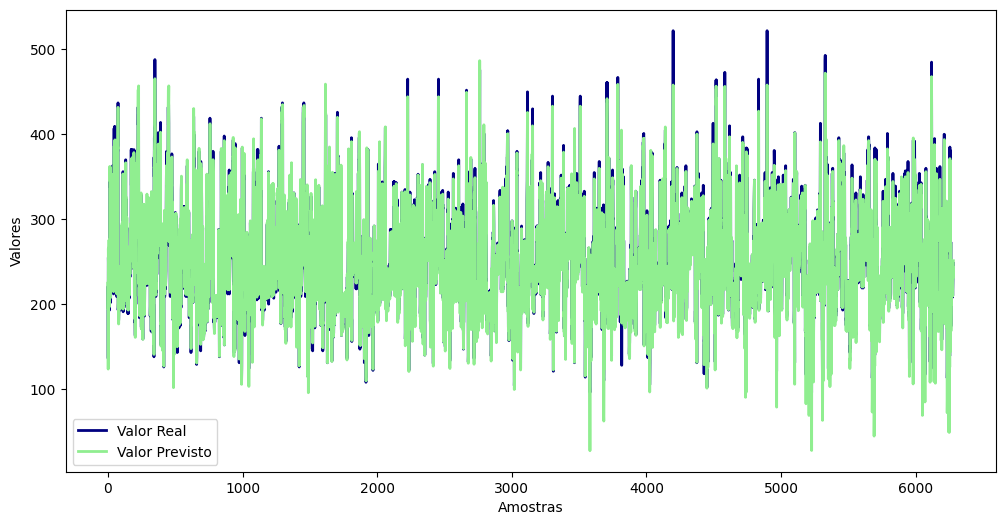

In [37]:
results = run(X, y, 0.3, True)
calc_metricas(results)
plot_acc(results['true'], results['pred'], 0.4)

 **Resultados usando Random Forest Regressor**

{'MAE': 2.9837140531962647, 'MSE': 23.150875069949347, 'RMSE': np.float64(4.811535624927799), 'R²': 0.9934133072997633}


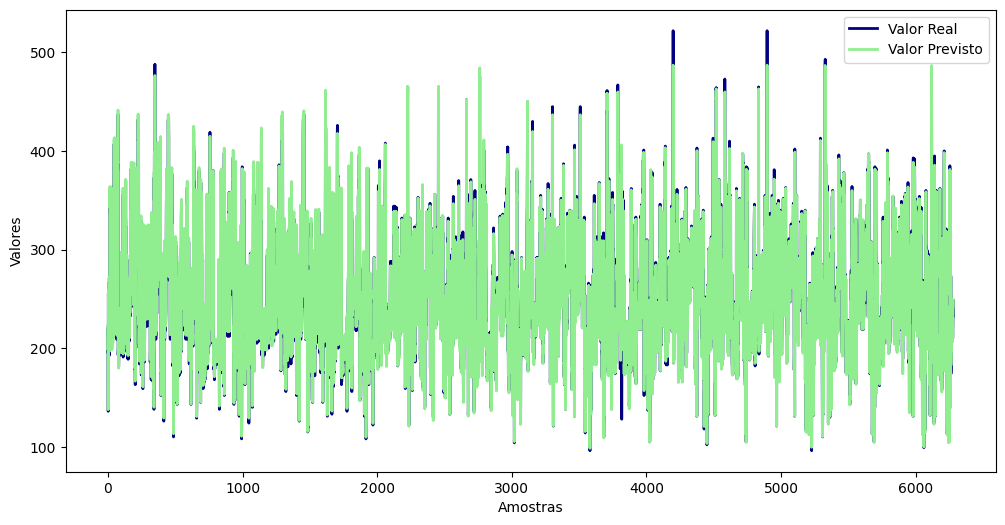

In [38]:
resultados_rfr = rfr_run(X,y, 0.3, True)
calc_metricas(resultados_rfr)
plot_acc(resultados_rfr['true'], resultados_rfr['pred'], 0.4)